In [61]:
from PIL import Image
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sn
import statsmodels.formula.api as snf

In [34]:
df = pd.read_csv('earnings.csv').drop('Unnamed: 0', axis =1)
df['age_sq'] = df['age']**2
df.sample()

,earn,height1,height2,sex,race,hisp,ed,yearbn,height,age,age_category,eth,male,age_sq
868,0.0,5,1,2,1,2,12,63,61,27,1,3,0,729


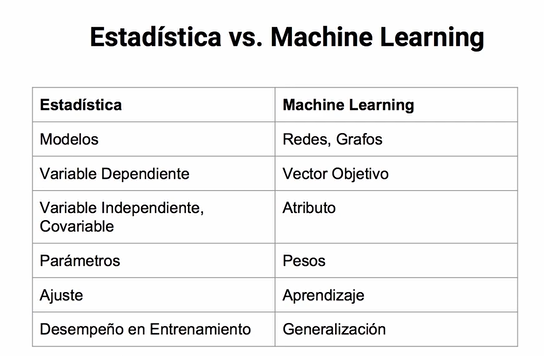

In [3]:
Image.open('intro_machine_learning.PNG','r') 

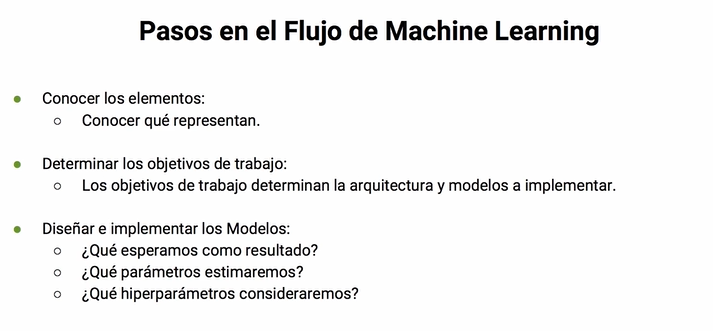

In [6]:
Image.open('pasos_flujo.PNG','r') 

## Importando modulos y separando muestras
- Libreria scikit_lear : libreria orientada a machine learning. La libreria tiene muchos modulos, por lo que se sugiere importar solo los modulos que necesitamos

In [35]:
#Metodo de regresión lineal
from sklearn.linear_model import LinearRegression

#Modulo de metricas para evaluar el desempeño del modelo
from sklearn.metrics import mean_squared_error, r2_score

Se generan dos conjuntos de datos:
- Training: Doonde implementamos el modelo
- Test: Donde probamos el modelo para contrastarlo con el vector objetivo de testing

In [36]:
#Se separa vector objetivo y se preserva identidad
attr_mat = df.drop(['earn'], axis =1)

In [37]:
#esta no es la mejor manera de hacerlo porq puede estar sesgado
x_mat_train = attr_mat[:-30] #separar las 1ras 30 observaciones
x_mat_test = attr_mat[-30:] #Obviamos las primeras 30 
y_train = df['earn'][:-30] #se usa vector objetivo
y_test = df['earn'][-30:] #se usa vector objetivo

Creamos un objeto y un modelo

In [38]:
modelo_sklearn = LinearRegression().fit(x_mat_train, y_train)

In [39]:
modelo_sklearn.coef_

array([   14.92703623,   132.30589935, -6360.94719277,  -661.37164603,
        1688.11542562,  2428.20840913,  -886.76446618,   311.43033413,
         886.76446618, -3038.69811608,   185.21329516,  6360.94719277,
         -15.73447966])

In [40]:
attr_mat.columns

Index(['height1', 'height2', 'sex', 'race', 'hisp', 'ed', 'yearbn', 'height',
       'age', 'age_category', 'eth', 'male', 'age_sq'],
      dtype='object')

In [41]:
modelo_sklearn.intercept_

13833.688816523012

### Metricas y evaluación del modelo

In [43]:
earn_yhat = modelo_sklearn.predict(x_mat_test)
earn_yhat

array([25598.087715  , 22456.39927869, 25859.43110455,  6927.53079027,
       19541.84095374, 23007.85181165, 15953.0359177 , 20722.82694069,
       30815.51755312, 42107.27749179, 17374.42556013, 27321.46818842,
       16039.6979205 , 42630.94412833, 18053.08347602, 25336.99601278,
       21507.10037955,  6230.39947764, 20825.36789164, -4891.86653372,
       20939.55454344, 31366.3369532 , 41244.16654204, 44883.74058834,
       24000.40337209, 24107.37666572, 18000.07128117, 12600.30094273,
       29170.58626159, 22120.37934468])

In [44]:
mse_modelo = mean_squared_error(y_test, earn_yhat).round(1)
r2_modelo = r2_score(y_test, earn_yhat).round(1)

print(f'MSE: {mse_modelo} ')
print(f'R2: {r2_modelo} ')

MSE: 393102326.6 
R2: 0.3 


### Teoría de aprendizaje estadistico

In [46]:
columns = df.columns

attr_name, pearson_r, abs_pearson_r = [], [], []

for col in columns:
    if col != 'earn':
        attr_name.append(col)
        pearson_r.append(df[col].corr(df['earn']))
        abs_pearson_r.append(abs(df[col].corr(df['earn'])))

features = pd.DataFrame(
    {'attribute': attr_name,
    'corr': pearson_r,
    'abs_corr': abs_pearson_r}
)

features = features.set_index('attribute')
features.sort_values(by = ['abs_corr'], ascending = False)

,corr,abs_corr
attribute,,
sex,-0.352354,0.352354
male,0.352354,0.352354
ed,0.349334,0.349334
height,0.302707,0.302707
height1,0.188762,0.188762
height2,0.105633,0.105633
age_category,0.075321,0.075321
yearbn,-0.068475,0.068475
age,0.068475,0.068475


In [48]:
y_vec = df['earn']
x_mat = df.loc[:,['sex', 'male', 'ed', 'height']]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_mat, y_vec, test_size = .33, random_state = 11238 )

In [53]:
purge_model = LinearRegression().fit(X_train, y_train)

In [59]:
purge_yhat = purge_model.predict(X_test)
purge_model_mse = mean_squared_error(y_test, purge_yhat).round(1)
purge_model_r2 = r2_score(y_test, purge_yhat)

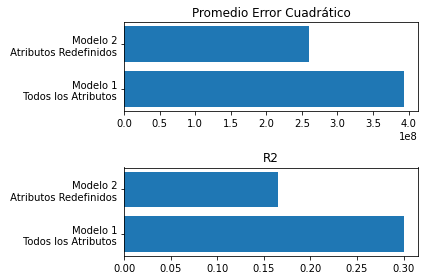

In [60]:
labels = ['Modelo 1\n Todos los Atributos', 'Modelo 2\n Atributos Redefinidos']
plt.subplot(2,1,1)
plt.barh(labels, [mse_modelo, purge_model_mse])
plt.title('Promedio Error Cuadrático')
plt.subplot(2,1,2)
plt.barh(labels, [r2_modelo, purge_model_r2])
plt.title('R2')
plt.tight_layout()